In [1]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

In [74]:
os.environ['TOKEN'] = '<YOURS>'

In [75]:
def auth():
    return os.getenv('TOKEN')

In [76]:

def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

In [93]:
def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {"'b26v89c19zqg8o3fosqtyj5svl07ptctnkv04fcrjsqd9'"}}
    return (search_url, query_params)

In [94]:
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [95]:

#Inputs for the request
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = "#farmersprotest lang:en"
start_time = "2021-01-01T00:00:00.000Z"
end_time = "2021-04-01T00:00:00.000Z"
max_results = 500

In [96]:
url = create_url(keyword, start_time,end_time, max_results)
json_response = connect_to_endpoint(url[0], headers, url[1])

Endpoint Response Code: 200


In [97]:
print(json.dumps(json_response, indent=4, sort_keys=True))

{
    "data": [
        {
            "author_id": "1242227464560168962",
            "conversation_id": "1377410194561372160",
            "created_at": "2021-03-31T23:59:16.000Z",
            "id": "1377410194561372160",
            "lang": "en",
            "public_metrics": {
                "like_count": 0,
                "quote_count": 0,
                "reply_count": 0,
                "retweet_count": 5
            },
            "referenced_tweets": [
                {
                    "id": "1377100853148930052",
                    "type": "retweeted"
                }
            ],
            "reply_settings": "everyone",
            "source": "Twitter for Android",
            "text": "RT @AlmeidaJugnu: This is the #MahaPanchayatRevolution and its for real! \n\n@FarmStudioz  @Being_Akbar @justchauhan @KaurRavdeep @DJSingh850\u2026"
        },
        {
            "author_id": "1242227464560168962",
            "conversation_id": "1377410138122805248",
            "

In [92]:
json_response['data']

[{'public_metrics': {'retweet_count': 5,
   'reply_count': 0,
   'like_count': 0,
   'quote_count': 0},
  'id': '1377410194561372160',
  'created_at': '2021-03-31T23:59:16.000Z',
  'lang': 'en',
  'referenced_tweets': [{'type': 'retweeted', 'id': '1377100853148930052'}],
  'source': 'Twitter for Android',
  'author_id': '1242227464560168962',
  'text': 'RT @AlmeidaJugnu: This is the #MahaPanchayatRevolution and its for real! \n\n@FarmStudioz  @Being_Akbar @justchauhan @KaurRavdeep @DJSingh850…',
  'conversation_id': '1377410194561372160',
  'reply_settings': 'everyone'},
 {'public_metrics': {'retweet_count': 9,
   'reply_count': 0,
   'like_count': 0,
   'quote_count': 0},
  'id': '1377410138122805248',
  'created_at': '2021-03-31T23:59:02.000Z',
  'lang': 'en',
  'referenced_tweets': [{'type': 'retweeted', 'id': '1370200835800641542'}],
  'source': 'Twitter for Android',
  'author_id': '1242227464560168962',
  'text': 'RT @ruby_roniece: This thread points out SOME of the concerns abou

In [17]:
json_response['meta']['result_count']

#427 tweets retrieved in this round

427

In [47]:
outpath = "C:\\Users\\anush\\Desktop\\McGill\\Winter 2022\\Digital humanities with So\\HASHTAG_CODE\\OUTPUT\\"

with open(outpath + 'data.json', 'w') as f:
    json.dump(json_response, f)

In [48]:
json_response

{'data': [{'referenced_tweets': [{'type': 'retweeted',
     'id': '1377100853148930052'}],
   'id': '1377410194561372160',
   'lang': 'en',
   'conversation_id': '1377410194561372160',
   'reply_settings': 'everyone',
   'text': 'RT @AlmeidaJugnu: This is the #MahaPanchayatRevolution and its for real! \n\n@FarmStudioz  @Being_Akbar @justchauhan @KaurRavdeep @DJSingh850…',
   'created_at': '2021-03-31T23:59:16.000Z',
   'source': 'Twitter for Android',
   'author_id': '1242227464560168962',
   'public_metrics': {'retweet_count': 5,
    'reply_count': 0,
    'like_count': 0,
    'quote_count': 0}},
  {'referenced_tweets': [{'type': 'retweeted', 'id': '1370200835800641542'}],
   'id': '1377410138122805248',
   'lang': 'en',
   'conversation_id': '1377410138122805248',
   'reply_settings': 'everyone',
   'text': 'RT @ruby_roniece: This thread points out SOME of the concerns about the #FarmLaws and why #farmers want full repeal. \n\nAlso for all of you…',
   'created_at': '2021-03-31T23:59:

In [49]:

# Create file
csvFile = open(outpath + "data.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet'])
csvFile.close()

In [50]:

def append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open(fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['data']:
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

        # 1. Author ID
        author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "

        # 4. Tweet ID
        tweet_id = tweet['id']

        # 5. Language
        lang = tweet['lang']

        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']

        # 7. source
        source = tweet['source']

        # 8. Tweet text
        text = tweet['text']
        
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Tweets added from this response: ", counter) 

In [51]:
append_to_csv(json_response, "data.csv")


# of Tweets added from this response:  427


In [52]:
json_response

{'data': [{'referenced_tweets': [{'type': 'retweeted',
     'id': '1377100853148930052'}],
   'id': '1377410194561372160',
   'lang': 'en',
   'conversation_id': '1377410194561372160',
   'reply_settings': 'everyone',
   'text': 'RT @AlmeidaJugnu: This is the #MahaPanchayatRevolution and its for real! \n\n@FarmStudioz  @Being_Akbar @justchauhan @KaurRavdeep @DJSingh850…',
   'created_at': '2021-03-31T23:59:16.000Z',
   'source': 'Twitter for Android',
   'author_id': '1242227464560168962',
   'public_metrics': {'retweet_count': 5,
    'reply_count': 0,
    'like_count': 0,
    'quote_count': 0}},
  {'referenced_tweets': [{'type': 'retweeted', 'id': '1370200835800641542'}],
   'id': '1377410138122805248',
   'lang': 'en',
   'conversation_id': '1377410138122805248',
   'reply_settings': 'everyone',
   'text': 'RT @ruby_roniece: This thread points out SOME of the concerns about the #FarmLaws and why #farmers want full repeal. \n\nAlso for all of you…',
   'created_at': '2021-03-31T23:59:

In [53]:
data = pd.DataFrame(json_response['data'])

In [64]:
data1 = data.drop(columns = ['in_reply_to_user_id', 'geo', 'withheld', 'reply_settings', 'source', 'conversation_id', 'lang', 'author_id'])

In [65]:
data1

,referenced_tweets,id,text,created_at,public_metrics
0,"[{'type': 'retweeted', 'id': '1377100853148930...",1377410194561372160,RT @AlmeidaJugnu: This is the #MahaPanchayatRe...,2021-03-31T23:59:16.000Z,"{'retweet_count': 5, 'reply_count': 0, 'like_c..."
1,"[{'type': 'retweeted', 'id': '1370200835800641...",1377410138122805248,RT @ruby_roniece: This thread points out SOME ...,2021-03-31T23:59:02.000Z,"{'retweet_count': 9, 'reply_count': 0, 'like_c..."
2,"[{'type': 'retweeted', 'id': '1376882801551663...",1377409887542464514,RT @SikhInside: Hola Mahalla celebrations at S...,2021-03-31T23:58:02.000Z,"{'retweet_count': 2, 'reply_count': 0, 'like_c..."
3,"[{'type': 'retweeted', 'id': '1377299749984944...",1377409627751477248,RT @learnpunjabi: No farmers no food. \n\n#Far...,2021-03-31T23:57:00.000Z,"{'retweet_count': 117, 'reply_count': 0, 'like..."
4,"[{'type': 'retweeted', 'id': '1377334576545034...",1377409612475854848,"RT @MonikaSidhuu: For a few weeks now, a petit...",2021-03-31T23:56:57.000Z,"{'retweet_count': 51, 'reply_count': 0, 'like_..."
...,...,...,...,...,...
422,"[{'type': 'retweeted', 'id': '1377089629229260...",1377352689894391808,RT @NavJammu: Even if poison is packaged nicel...,2021-03-31T20:10:45.000Z,"{'retweet_count': 400, 'reply_count': 0, 'like..."
423,"[{'type': 'retweeted', 'id': '1377236576581734...",1377352675629535233,RT @saahilmenghani: #Verified\n\n👉Big move in ...,2021-03-31T20:10:42.000Z,"{'retweet_count': 686, 'reply_count': 0, 'like..."
424,"[{'type': 'retweeted', 'id': '1377236576581734...",1377352672374743046,RT @saahilmenghani: #Verified\n\n👉Big move in ...,2021-03-31T20:10:41.000Z,"{'retweet_count': 686, 'reply_count': 0, 'like..."
425,"[{'type': 'retweeted', 'id': '1377340317641310...",1377352600647962629,RT @DharniJagpreet: Punjab is got no chill\n\n...,2021-03-31T20:10:24.000Z,"{'retweet_count': 2, 'reply_count': 0, 'like_c..."


In [107]:
outpath = "C:\\Users\\anush\\Desktop\\McGill\\Winter 2022\\Digital humanities with So\\HASHTAG_CODE\\OUTPUT\\"
#Inputs for tweets
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = '#FarmersProtest lang:en -is:retweet -is:reply'
start_list =    ['2021-01-01T00:00:00.000Z',
                 '2021-02-01T00:00:00.000Z',
                 '2021-03-01T00:00:00.000Z']

end_list =      ['2021-01-31T00:00:00.000Z',
                 '2021-02-28T00:00:00.000Z',
                 '2021-03-31T00:00:00.000Z']
max_results = 500

#Total number of tweets we collected from the loop
total_tweets = 0

# Create file
csvFile = open(outpath + "data_try1.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet'])
csvFile.close()

for i in range(0,len(start_list)):

    # Inputs
    count = 0 # Counting tweets per time period
    max_count = 500 # Max tweets per time period
    flag = True
    next_token = None
    
    # Check if flag is true
    while flag:
        # Check if max_count reached
        if count >= max_count:
            break
        print("-------------------")
        print("Token: ", next_token)
        url = create_url(keyword, start_list[i],end_list[i], max_results)
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        result_count = json_response['meta']['result_count']

        if 'next_token' in json_response['meta']:
            # Save the token to use for next call
            next_token = json_response['meta']['next_token']
            print("Next Token: ", next_token)
            if result_count is not None and result_count > 0 and next_token is not None:
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, outpath + "data_try1.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)                
        # If no next token exists
        else:
            if result_count is not None and result_count > 0:
                print("-------------------")
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, outpath + "data_try1.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)
            
            #Since this is the final request, turn flag to false to move to the next time period.
            flag = False
            next_token = None
        time.sleep(5)
print("Total number of results: ", total_tweets)

-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosktkk5vr1vq57zxt8gyf5fj5vwxp
Start Date:  2021-01-01T00:00:00.000Z
# of Tweets added from this response:  449
Total # of Tweets added:  449
-------------------
-------------------
Token:  b26v89c19zqg8o3fosktkk5vr1vq57zxt8gyf5fj5vwxp
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosktkk4oldg3dz4is8dbux2cice4d
Start Date:  2021-01-01T00:00:00.000Z
# of Tweets added from this response:  447
Total # of Tweets added:  896
-------------------
-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosntcic3kycfx8ybgqhegf27sk0vx
Start Date:  2021-02-01T00:00:00.000Z
# of Tweets added from this response:  468
Total # of Tweets added:  1364
-------------------
-------------------
Token:  b26v89c19zqg8o3fosntcic3kycfx8ybgqhegf27sk0vx
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosntcg7dimzg518vdwa5612zijtdp
Start Date:  2021-02-01T00:00:00.000Z
# of T

In [109]:
outpath = "C:\\Users\\anush\\Desktop\\McGill\\Winter 2022\\Digital humanities with So\\HASHTAG_CODE\\OUTPUT\\"
#Inputs for tweets
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = '#StandWithFarmers lang:en -is:retweet -is:reply'
start_list =    ['2021-01-01T00:00:00.000Z',
                 '2021-02-01T00:00:00.000Z',
                 '2021-03-01T00:00:00.000Z']

end_list =      ['2021-01-31T00:00:00.000Z',
                 '2021-02-28T00:00:00.000Z',
                 '2021-03-31T00:00:00.000Z']
max_results = 500

#Total number of tweets we collected from the loop
total_tweets = 0

# Create file
csvFile = open(outpath + "data_try1.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet'])
csvFile.close()

for i in range(0,len(start_list)):

    # Inputs
    count = 0 # Counting tweets per time period
    max_count = 500 # Max tweets per time period
    flag = True
    next_token = None
    
    # Check if flag is true
    while flag:
        # Check if max_count reached
        if count >= max_count:
            break
        print("-------------------")
        print("Token: ", next_token)
        url = create_url(keyword, start_list[i],end_list[i], max_results)
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        result_count = json_response['meta']['result_count']

        if 'next_token' in json_response['meta']:
            # Save the token to use for next call
            next_token = json_response['meta']['next_token']
            print("Next Token: ", next_token)
            if result_count is not None and result_count > 0 and next_token is not None:
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, outpath + "data_try1.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)                
        # If no next token exists
        else:
            if result_count is not None and result_count > 0:
                print("-------------------")
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, outpath + "data_try1.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)
            
            #Since this is the final request, turn flag to false to move to the next time period.
            flag = False
            next_token = None
        time.sleep(5)
print("Total number of results: ", total_tweets)

-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3foskt5kwx7cctya6rpq0sq5jb03tz1
Start Date:  2021-01-01T00:00:00.000Z
# of Tweets added from this response:  468
Total # of Tweets added:  468
-------------------
-------------------
Token:  b26v89c19zqg8o3foskt5kwx7cctya6rpq0sq5jb03tz1
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosksqhf3uqi7bo02fmecvrxsmvs71
Start Date:  2021-01-01T00:00:00.000Z
# of Tweets added from this response:  478
Total # of Tweets added:  946
-------------------
-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosnsi0q1gy8dt69n0yfa8q3tu5pj1
Start Date:  2021-02-01T00:00:00.000Z
# of Tweets added from this response:  485
Total # of Tweets added:  1431
-------------------
-------------------
Token:  b26v89c19zqg8o3fosnsi0q1gy8dt69n0yfa8q3tu5pj1
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosns2x87zsaptusrfw2o1dz0aiwsd
Start Date:  2021-02-01T00:00:00.000Z
# of T

In [112]:
outpath = "C:\\Users\\anush\\Desktop\\McGill\\Winter 2022\\Digital humanities with So\\HASHTAG_CODE\\OUTPUT\\"
#Inputs for tweets
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = '#IndiaTogether lang:en -is:retweet -is:reply'
start_list =    ['2021-01-01T00:00:00.000Z',
                 '2021-02-01T00:00:00.000Z',
                 '2021-03-01T00:00:00.000Z']

end_list =      ['2021-01-31T00:00:00.000Z',
                 '2021-02-28T00:00:00.000Z',
                 '2021-03-31T00:00:00.000Z']
max_results = 500

#Total number of tweets we collected from the loop
total_tweets = 0

# Create file
csvFile = open(outpath + "data_try1.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet'])
csvFile.close()

for i in range(0,len(start_list)):

    # Inputs
    count = 0 # Counting tweets per time period
    max_count = 500 # Max tweets per time period
    flag = True
    next_token = None
    
    # Check if flag is true
    while flag:
        # Check if max_count reached
        if count >= max_count:
            break
        print("-------------------")
        print("Token: ", next_token)
        url = create_url(keyword, start_list[i],end_list[i], max_results)
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        result_count = json_response['meta']['result_count']

        if 'next_token' in json_response['meta']:
            # Save the token to use for next call
            next_token = json_response['meta']['next_token']
            print("Next Token: ", next_token)
            if result_count is not None and result_count > 0 and next_token is not None:
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, outpath + "data_try1.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)                
        # If no next token exists
        else:
            if result_count is not None and result_count > 0:
                print("-------------------")
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, outpath + "data_try1.csv")
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)
            
            #Since this is the final request, turn flag to false to move to the next time period.
            flag = False
            next_token = None
        time.sleep(5)
print("Total number of results: ", total_tweets)

-------------------
Token:  None
Endpoint Response Code: 200
-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosnsxajc8pk50gfllzkym1vrp47el
Start Date:  2021-02-01T00:00:00.000Z
# of Tweets added from this response:  440
Total # of Tweets added:  440
-------------------
-------------------
Token:  b26v89c19zqg8o3fosnsxajc8pk50gfllzkym1vrp47el
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosnshwe6tc1vgxgguwztpj5fd7i4d
Start Date:  2021-02-01T00:00:00.000Z
# of Tweets added from this response:  444
Total # of Tweets added:  884
-------------------
-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosnulqkmq0hxttffbv32613y89sot
Start Date:  2021-03-01T00:00:00.000Z
# of Tweets added from this response:  462
Total # of Tweets added:  1346
-------------------
-------------------
Token:  b26v89c19zqg8o3fosnulqkmq0hxttffbv32613y89sot
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosntrhi2bfkkf

In [113]:
data_try1 = outpath + 'data_try1.csv'

#get data read and drop any empty row

Hashtag_meta = pd.read_csv(data_try1, encoding='latin1')




In [115]:
Hashtag_meta.head()
#Hashtag_meta1 = Hashtag_meta.dropna(axis=0, subset=['tweet'])

In [118]:
Hashtag_meta.drop(columns = ['geo', 'lang', 'source', 'reply_count'])

,author id,created_at,id,like_count,quote_count,retweet_count,tweet
0,1078382299597672448,2021-01-30 23:57:26+00:00,1355666461965000704,0,0,0,how can i help? #FarmersProtest
1,1335255158305984519,2021-01-30 23:55:19+00:00,1355665929401753604,7,0,7,Nothing has changed for Sikhs in India since 1...
2,19945292,2021-01-30 23:55:01+00:00,1355665853417664514,10,2,5,We need 100K signatures for the UK government ...
3,1347775963258564610,2021-01-30 23:54:33+00:00,1355665735960420354,0,0,0,Indian media propaganda.. bless theyâre runn...
4,1202970764695285760,2021-01-30 23:53:40+00:00,1355665513389682689,0,0,0,Govt violence against #Farmers \n\n#FarmersPro...
...,...,...,...,...,...,...,...
8938,1353697439107047424,2021-03-01 11:29:59+00:00,1366349995037757440,15,0,4,Together we Stand \n#goodafternoon #mondaythou...
8939,124375542,2021-03-01 11:10:05+00:00,1366344988699758597,0,0,0,Let's drive the discriminations away forever -...
8940,1348893327089758211,2021-03-01 11:01:04+00:00,1366342718008385542,0,0,0,#IndiaTogether #peace #India #FORCE #PMOIndia ...
8941,1340898734796722176,2021-03-01 10:18:49+00:00,1366332089340022797,1,0,0,Who is your favorite Indian Industrialist?\n#R...


In [119]:
#now do topic modeling and word2vec for this data
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation #our version of sklearn should recognize this

import pandas as pd
import codecs
import numpy as np

In [120]:
tweet_list = Hashtag_meta['tweet'].tolist()

In [178]:
tweet_list, len(tweet_list), len(set(tweet_list))

(['how can i help? #FarmersProtest',
  'Nothing has changed for Sikhs in India since 1984   !!!!!!\n\n#FarmersProtest https://t.co/EhlHfrxvOd',
  'We need 100K signatures for the UK government to make a statement about the current #FarmersProtest in India\n\nPlease click the link to sign the petition ð\x9f\x99\x8fð\x9f\x8f½\n\nhttps://t.co/82JaIwiVPa',
  'Indian media propaganda.. bless theyâ\x80\x99re running out of tricks #KisaanEktaJindabaad @amnesty #farmersprotest https://t.co/Iny5BcBtTf',
  'Govt violence against #Farmers \n\n#FarmersProtest \n#ReleaseMandeepPunia https://t.co/ydQDrSB4wL',
  'What made our youngsters go to the #RedFort? Was it a mistake or a well thought out plan?\n#KisaanEktaJindabaad \n#FarmersProtest https://t.co/opeqraiorF',
  'Their true image is already badly tarnished.\n#ModiPlanningFarmerGenocide #FarmersProtest \n@CanadianPM @theJagmeetSingh @jjhorgan @fordnation @GurratanSingh @HarjitSajjan @MarcGarneau @WhiteHouse @JoeBiden \n@cvoule @hrw @un @amnestyp

In [214]:
import nltk
import string
nltk.download('punkt')

tweets_unique = set(tweet_list)
words = [word for tweet in tweets_unique for word in nltk.word_tokenize(tweet)]
sentences = [sentence for tweet in tweets_unique for sentence in nltk.sent_tokenize(tweet)]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [216]:
sentences

['The common man might not realise it but this affects us all.',
 'The farmers are fighting the good fight for us too, let us stand by them.',
 '#FarmersProtests \n#StandWithFarmers  \n#FarmersSupportTraders',
 'This is a senior member of @INCIndia Party!!',
 'This tweet shows his cheap mentality.',
 '#IndiaAgainstPropaganda https://t.co/5Tnj7GOiE5',
 "waiting for @ImRo45 's century &amp; @RishabhPant17 's bombardier batting 4 India to win the test match by inning to built this stadium as india's fort for coming years... tough task for @root66 to save match #INDvENG #INDvsENG_2021 #INDvsENG @imVkohli #IndiaTogether #IndiaWithModi https://t.co/z8QIrxiBay",
 'Best scenario to resolve #FarmersProtest is if BJP canâ\x80\x99t win #WestBengal, DMK+ wins in #TamilNadu (even if BJP retains Assam).',
 'Then fate of UP/Haryana shall be in farmersâ\x80\x99 hands, forcing gov to sue for peace.',
 'Contrariwise, BJP plan is to win most &amp; claim mandate for #FarmLaws.',
 'â\x9b\x93 Say No To Boll

In [217]:
ignore=[]
import re

for item in sentences:
    tweets = sentences
    ignore.append([i  for i in item.split() if ((i.startswith("@")) or (i.startswith("cricket")) or (i.endswith("cricket")) or (i.startswith("corona")) or (i.endswith("corona")) or (i.startswith("covid")) or (i.endswith("covid")) or (i.endswith("covid19")))])
    
custom_list = ["womensday", "freedomhouse", "womenshistorymonth", "saveindia", "petrolprice", "wesalutewomenfarmers", "partly", "kenaff", "technical", "501", "celebration", "indianfarmer", "sorry", "ussd", "pannu", "karnataka", "vaccines", "_à ¾à", "farmersprotest", "¹à", "https", "co", "may", "hai", "chardi", "indiaagainstpropoganda", "staysafe", "maskupindia", "maskup", "suprabhatamð", "retweeet", "jaipurdialogues", "anuragkashyap", "humdohamaredo", "ambaniadanijeevi", "facebook", "narendramodistadium", "trendingnow", "motivationalquotes", "holi", "instagram", "million", "arnab", "ahmedabad", "careers", "english", "successfultips4students", "succession", "amazon", "rising", "virat", "indiawantscrypto", "covaxin", "book", "kohli", "ur", "kerala", "covid19", "from", "tamilnadu", "tamilnaduassemblyelection2021", "westbengal", "assam", "assamassemblyelections2021", "lic", "bank", "keralaelections2021", "rapist", "westbengalpolls", "daughters", "missioncosmos", "getcosmic", "miss", "cosmos", "mission", "indianairforce", "elonmusk", "fridaymorning", "harmy76_kaur", "kaurisqueen9", "onnnia1", "pawanpreetkaurg", "the", "and", "to", "is", "was", "a", "an", "of", "standwithfarmers", "in", "for", "indiatogether", "this", "you", "are", "on", "amp", "it", "indiaagainstpropaganda", "with", "not", "that", "rctgunjangoira", "w18l", "zeenewsenglish", "covid19vaccination", "indiaagainstpropaganda", "indiatogether", "greatestquotes", "qotd", "indvseng", "cricket", "indiafightscorona", "vaccinemaitri", "sachin_rt", "bcci", "indveng"]

ignore.append(custom_list)

In [218]:
stop_words = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

ignore.append(stop_words)

In [219]:
#ignore
#ignore1

flat_ignore = [item for sublist in ignore for item in sublist]
flat_ignore

['@INCIndia',
 '@ImRo45',
 '@RishabhPant17',
 '@root66',
 '@imVkohli',
 '@greatestquotes',
 '@narendramodi',
 '@PMOIndia',
 '@msisodia',
 '@aroonpurie',
 '@JioCare',
 '@reliancejio',
 '@RelianceDigital',
 '@narendramodi_in',
 '@rashtrapatibhvn',
 '@SupremeCourtFan',
 '@DOJPH',
 '@RaviSinghKA!',
 '@Kaepernick7',
 '@KingJames',
 '@breannastewart',
 '@naomiosaka',
 '@carmeloanthony',
 '@DwyaneWade',
 '@joliestweet',
 '@Kisanektamorcha',
 '@trolleytimes',
 '@AnnDaata',
 '@narendramodi',
 '@AskAnshul',
 '@OpIndia_com',
 '@PuspendraTweet',
 '@kansaratva',
 '@UnSubtleDesi',
 '@AshokShrivasta6',
 '@ABVPVoice',
 '@PMOIndia',
 '@AmitShah',
 '@narendramodi',
 '@AmitShahOffice',
 '@ndtv',
 '@ndtvindia',
 '@ZeeNews',
 '@IndiaToday',
 '@aajtak',
 '@BBCNews',
 '@NBCNews',
 '@nytimes',
 '@SkyNews',
 '@IndianExpress',
 '@timesofindia',
 '@IamArchieMusic',
 '@ChaweMayne',
 '@andretheprod',
 '@TanDhesi',
 '@ClaudiaWebbe',
 '@patmcfaddenmp',
 '@capitaltvindia',
 '@DrManishKumar1',
 '@TimesNow',
 '@republi

In [228]:
tweets_clean1 = []
exclude = string.punctuation

for stuff in sentences:
    if stuff not in (flat_ignore and exclude):
        tweets_clean1.append(stuff)
        
len(tweets_clean1), len(sentences), tweets_clean1

(17669,
 17778,
 ['The common man might not realise it but this affects us all.',
  'The farmers are fighting the good fight for us too, let us stand by them.',
  '#FarmersProtests \n#StandWithFarmers  \n#FarmersSupportTraders',
  'This is a senior member of @INCIndia Party!!',
  'This tweet shows his cheap mentality.',
  '#IndiaAgainstPropaganda https://t.co/5Tnj7GOiE5',
  "waiting for @ImRo45 's century &amp; @RishabhPant17 's bombardier batting 4 India to win the test match by inning to built this stadium as india's fort for coming years... tough task for @root66 to save match #INDvENG #INDvsENG_2021 #INDvsENG @imVkohli #IndiaTogether #IndiaWithModi https://t.co/z8QIrxiBay",
  'Best scenario to resolve #FarmersProtest is if BJP canâ\x80\x99t win #WestBengal, DMK+ wins in #TamilNadu (even if BJP retains Assam).',
  'Then fate of UP/Haryana shall be in farmersâ\x80\x99 hands, forcing gov to sue for peace.',
  'Contrariwise, BJP plan is to win most &amp; claim mandate for #FarmLaws.',


In [224]:
# Vectorize texts

tf_vectorizer = CountVectorizer(stop_words=flat_ignore)
tf = tf_vectorizer.fit_transform(tweets_clean1)
tf_feature_names = tf_vectorizer.get_feature_names()

tf_feature_names

D:\ANACONDA\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['10downingstreet', '18jatansingh58', '1newsnz', '7newscanberra', '9newsaus', '__imiiee', '__its_tee', '__kidinlove', '_aaj_tak', '_bardh_ma_jao', '_deshkanamak', '_ekta_gupta_', '_garrywalia', '_innovafrica', '_jk_photography', '_mukeshambani', '_peacekeeper2', '_pmsalim', '_preetipandey', '_sanjaygupta', '_saud_786', '_therealvaibhav', '_uniquerose_', '_yogendrayadav', '_à', 'aajtak', 'aamaadmiparty', 'aamir_khan', 'aapkadharam', 'aapkagopalrai', 'aapkaprithvi', 'aapkarnataka', 'aapkasurender', 'aappunjab', 'aapsmwarriors', 'aashuch33074594', 'abbas_nighat', 'abby_oye_hassu', 'abc', 'abc730', 'abcnews', 'abdevilliers17', 'abdulla_shahid', 'abdulra1986kh', 'abdulra51492277', 'abhiandniyu', 'abhinaymaths', 'abhisar_sharma', 'abntelugutv', 'abpanandatv', 'abpmajhatv', 'abpnews', 'abvpvoice', 'actor_sidd

['00',
 '000',
 '00kluswjgj',
 '00pm',
 '00sqeit558',
 '01xxjgxgdv',
 '02',
 '024v1w3ffw',
 '03',
 '03iqwjsoh0',
 '04',
 '046cr',
 '046dy2imod',
 '0478917',
 '04b5qw88rz',
 '04oxadkem9',
 '04vkijpxdg',
 '05',
 '050nip3dmf',
 '05y1zk44ok',
 '06',
 '06insqlyog',
 '06xvesv73s',
 '07',
 '071g10fheu',
 '073',
 '07bg44xwdg',
 '07ptbbffnx',
 '07tqbdpdc1',
 '07uq7dlwb5',
 '08',
 '08037304045',
 '08aa5heo6x',
 '08t2ukuexn',
 '09',
 '09jeqikvqy',
 '09qvtjlp6j',
 '0ab6qklmrk',
 '0acmsgwddn',
 '0adxrx45sq',
 '0as9nqczqu',
 '0ax5uisgyn',
 '0besm49bfn',
 '0br6e6higa',
 '0brsraxvqd',
 '0bvnxmtuad',
 '0c8yuvpi7b',
 '0cddpxbvbr',
 '0dstbx1u79',
 '0eaaju6whu',
 '0ejd2rcxax',
 '0elvzuchtz',
 '0erbedefjk',
 '0esuukugri',
 '0etp9muv8l',
 '0ezl4zkh4a',
 '0fdlbqjtea',
 '0ffa67ufij',
 '0fhu8aqwxh',
 '0fkzknvjxb',
 '0flcrtzgni',
 '0fmvyozghr',
 '0foe0nuyt6',
 '0gejhqvsel',
 '0gkrqasaxi',
 '0goo5soljo',
 '0h84wit2dm',
 '0hbhg1kqqt',
 '0hh2jsalbh',
 '0hhtgqj6pq',
 '0iiaiu86i2',
 '0inoizfepc',
 '0iwi7ip335',
 '0j

In [225]:
# Run Topic model

lda = LatentDirichletAllocation(25, max_iter=200, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [226]:
# Next process

lda_W = lda.transform(tf)
lda_H = lda.components_

In [227]:
# Next get top words + top docs by topic
#dtm = document TOPIC matrix here instead of terms

def display_topics(H, W, feature_names, documents, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(H):
        ("Topic %d:" % (topic_idx))
        topics.append((("Topic %d:" % (topic_idx)), " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]])))
        
    return topics
            
no_top_words = 50 # this is arbitrary decided by the USER, YOU DECIDE

topics = display_topics(lda_H, lda_W, tf_feature_names, tweet_list, no_top_words)
topics

[('Topic 0:',
  'freedom free istandwithfarmers india gretathunberg rihanna ndtv flag activists speech bbcnews indiatoday press agenda freemandeeppunia nytimes duty skynews ndtvindia whatsapp target online vp matters internationalwomensday terrorists nbcnews involved blacklivesmatter usa cnnbrk lockdown university amnesty sahib aajtak security pass choose played cost google climate music providing hero personal expression biased access'),
 ('Topic 1:',
  'humanrights stay peaceful united jai women ³ð real happy waheguru ½ð kisaan living kisan kala farmbills2020 farmersprotests jiwan grant sarbaat bhalla farmerscallbjpboycott question hind ½â huge men isupportfarmers ongoing indiafights4farmerrights absolutely leave special farmersroarinbengal nofarmernofood lilly hinduvta farmersabovereligioushate focus pagdi_sambhal_jatta kisaanmazdoorektazindabaad yoga kissanektajindabad photo led 300deathsatprotest meditation divided soldiers blessed'),
 ('Topic 2:',
  'pmoindia hate propaganda read

In [211]:
#now run word2vec and analyze this
# Sentence Tokenize (word2vec takes sentences)




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

['how',
 'can',
 'i',
 'help',
 '?',
 '#',
 'FarmersProtest',
 'FarmersProtest',
 'Nothing',
 'Nothing',
 'has',
 'changed',
 'changed',
 'for',
 'Sikhs',
 'Sikhs',
 'in',
 'India',
 'India',
 'since',
 '1984',
 '1984',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '#',
 'FarmersProtest',
 'FarmersProtest',
 'https',
 ':',
 '//t.co/EhlHfrxvOd',
 '//t.co/EhlHfrxvOd',
 'We',
 'We',
 'need',
 '100K',
 '100K',
 'signatures',
 'signatures',
 'for',
 'the',
 'UK',
 'UK',
 'government',
 'government',
 'to',
 'make',
 'a',
 'statement',
 'statement',
 'about',
 'the',
 'current',
 'current',
 '#',
 'FarmersProtest',
 'FarmersProtest',
 'in',
 'India',
 'India',
 'Please',
 'Please',
 'click',
 'click',
 'the',
 'link',
 'link',
 'to',
 'sign',
 'sign',
 'the',
 'petition',
 'petition',
 'ð\x9f\x99\x8fð\x9f\x8f½',
 'ð\x9f\x99\x8fð\x9f\x8f½',
 'https',
 ':',
 '//t.co/82JaIwiVPa',
 '//t.co/82JaIwiVPa',
 'Indian',
 'Indian',
 'media',
 'media',
 'propaganda',
 'propaganda',
 '..',
 '..',
 'bless',
 'bless

In [159]:
ignore[-1]

['womensday',
 'freedomhouse',
 'womenshistorymonth',
 'saveindia',
 'petrolprice',
 'wesalutewomenfarmers',
 'partly',
 'kenaff',
 'technical',
 '501',
 'celebration',
 'indianfarmer',
 'sorry',
 'ussd',
 'pannu',
 'karnataka',
 'vaccines',
 '_à ¾à',
 'farmersprotest',
 '¹à',
 'https',
 'co',
 'may',
 'hai',
 'chardi',
 'indiaagainstpropoganda',
 'staysafe',
 'maskupindia',
 'maskup',
 'suprabhatamð',
 'retweeet',
 'jaipurdialogues',
 'anuragkashyap',
 'humdohamaredo',
 'ambaniadanijeevi',
 'facebook',
 'narendramodistadium',
 'trendingnow',
 'motivationalquotes',
 'holi',
 'instagram',
 'million',
 'arnab',
 'ahmedabad',
 'careers',
 'english',
 'successfultips4students',
 'succession',
 'amazon',
 'rising',
 'virat',
 'indiawantscrypto',
 'covaxin',
 'book',
 'kohli',
 'ur',
 'kerala',
 'covid19',
 'from',
 'tamilnadu',
 'tamilnaduassemblyelection2021',
 'westbengal',
 'assam',
 'assamassemblyelections2021',
 'lic',
 'bank',
 'keralaelections2021',
 'rapist',
 'westbengalpolls',
 'd

In [229]:
# Fast, bespoke tokenizer for large corpus; can use more standard spacy or NLTK word tokenizer tho

def fast_tokenize(text):
    
    # Get a list of punctuation marks
    from string import punctuation
    
    # Iterate through text removing punctuation characters
    no_punct = "".join([char for char in text if char not in punctuation])
    
    # Split text over whitespace into list of words
    tokens = no_punct.split()
    
    return tokens

#we are working at the corpus level so we are not maintaining them by indices.

In [230]:
# Word tokenize

words_by_sentence = [fast_tokenize(sentence.lower()) for sentence in sentences]

In [234]:
# Inspect # Sanity check

words_by_sentence[11], len(words_by_sentence)

(['support',
  'farmers',
  'speak',
  'up',
  'for',
  'farmers',
  'releasedetainedfarmers',
  'farmersprotests',
  'standwithfarmers',
  'httpstcowbynqvs7u4'],
 17778)

In [235]:
# Train word2vec using CBOW

# CBOW vs SKIP GRAM information
# https://stackoverflow.com/questions/38287772/cbow-v-s-skip-gram-why-invert-context-and-target-words

import gensim
model = gensim.models.Word2Vec(words_by_sentence, window=5, \
                               min_count=5, sg=0, alpha=0.025, batch_words=10000)

#does not work with parameters iter and size

In [236]:
model.wv['farmers']

array([-0.2504023 ,  0.13232476,  0.2001758 ,  0.45436916,  0.3069307 ,
       -0.8924413 ,  0.769953  ,  0.19118202,  0.04413863, -0.4787783 ,
       -0.14326675, -0.65173775,  0.21292078,  0.5541914 ,  0.8879471 ,
       -0.52307606,  0.5284823 , -0.04080143, -0.48929417, -1.4049554 ,
        0.639739  ,  0.78214675, -0.01331368, -1.1667532 ,  0.47780573,
        0.21720996, -0.85918534, -0.6267164 , -0.16635959, -0.88718134,
        1.2092149 , -0.26611552,  0.06579613, -0.20870909, -1.1073391 ,
        0.482469  , -0.1048425 ,  0.87745166, -0.2529688 , -1.2668114 ,
        0.2083283 ,  0.11466312, -0.01414198,  0.73436713,  0.17377542,
       -0.5397435 , -0.39638022,  0.07650998, -0.70041907,  0.6827498 ,
       -0.22594778, -0.3163786 ,  0.21668965, -0.10377819, -0.26178196,
        1.1655276 , -0.1059523 , -0.11244203, -0.24839891, -0.44703263,
       -0.0793033 ,  0.45587677,  0.33937958, -0.20100154, -1.2750845 ,
        0.4293548 ,  0.12505288,  1.0493046 , -0.822083  ,  1.08

In [242]:
model.wv.similarity('farmers','khalistani'), model.wv.similarity('farmers','rights'), model.wv.similarity('farmers','propaganda'), model.wv.similarity('farmers','india'), model.wv.similarity('farmers','nationalism')

#farmers and khalistani gets MORE SIMILARITY MATCH than FARMERS AND INDIA
#Discourse on nationalism - VERY IMPORTANT FIND

(0.65526915, 0.8811951, 0.67705894, 0.4986914, 0.5797328)

In [245]:
model.wv.similarity('modi','hate'), model.wv.similarity('farmers','hate'), model.wv.similarity('bjp','hate')

#VERY IMPORTANT FIND -- HATE linked more with farmers than with bjp/modi
#VERY INTERESTING -- Modi and VIOLENCE linked almost as much as FARMERS AND VIOLENCE while BJP and VIOLENCE is much lesser

(0.624076, 0.73786694, 0.52285707)

In [246]:
model.wv.similarity('bjp','violence'), model.wv.similarity('farmers','violence'), model.wv.similarity('modi','violence')

(0.6559464, 0.71383303, 0.7967948)

In [247]:
model.wv.similarity('bjp','blood'), model.wv.similarity('farmers','blood'), model.wv.similarity('modi','blood')

#VERY IMPORTANT -- BJP, Modi linked EXTREMELY CLOSELY to blood while farmers are much less linked with it

(0.72118086, 0.60018325, 0.86263835)

In [269]:
model.wv.similarity('bjp','toolkit'), model.wv.similarity('farmers','toolkit'), model.wv.similarity('modi','toolkit'), model.wv.similarity('propaganda','toolkit'), model.wv.similarity('celebrity','toolkit'), model.wv.similarity('protest','toolkit')

#VERY VERY INTERESTING -- shows something GOOD for farmers and protests in India
#-- BJP and MODI were associated more with the notion of toolkit, but that might just be
#because the celebrity toolkit stuff is overshadowed by the data from the 1st two months

(0.75759566, 0.43725026, 0.94870603, 0.93683654, 0.94317687, 0.4396521)

In [265]:
#n_similarity is top number of words
model.wv.n_similarity(['farmers','propaganda'],['modi','propaganda']), model.wv.n_similarity(['bjp','hate'],['farmers','hate']), model.wv.n_similarity(['bjp','toolkit'],['farmers','toolkit'])

(0.62166226, 0.65213287, 0.5985067)

In [255]:
model.wv.doesnt_match(['farmers','khalistan', 'india'])

'farmers'

In [256]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['farmers', 'democracy'], topn=10)

#woman, democracy -- got man, but man, democracy got no woman

[('struggle', 0.9765871167182922),
 ('supporting', 0.9718916416168213),
 ('lives', 0.9660282731056213),
 ('somehow', 0.9654466509819031),
 ('protests', 0.9622235298156738),
 ('fundamental', 0.9616206884384155),
 ('standing', 0.9556894898414612),
 ('movement', 0.9556596279144287),
 ('asking', 0.9552826881408691),
 ('died', 0.9549916386604309)]

In [257]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['modi', 'democracy'], topn=10)

#woman, democracy -- got man, but man, democracy got no woman

[('funny', 0.9720912575721741),
 ('pm', 0.9713135361671448),
 ('newindia', 0.9660953283309937),
 ('allowed', 0.9637870192527771),
 ('maddog', 0.9624837636947632),
 ('underway', 0.961765706539154),
 ('gem', 0.9593411087989807),
 ('rejected', 0.957984983921051),
 ('key', 0.9576199054718018),
 ('nowadays', 0.957085371017456)]

In [258]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['bjp', 'democracy'], topn=10)

#woman, democracy -- got man, but man, democracy got no woman

[('rss', 0.9476923942565918),
 ('mla', 0.9320938587188721),
 ('soldier', 0.931555986404419),
 ('planted', 0.9302246570587158),
 ('muslim', 0.9251012802124023),
 ('goons', 0.9247762560844421),
 ('narendra', 0.9227654933929443),
 ('sarkar', 0.9219558835029602),
 ('destroying', 0.9209224581718445),
 ('pm', 0.9208725094795227)]

In [259]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['farmers', 'rights'], topn=10)

#woman, democracy -- got man, but man, democracy got no woman

[('feed', 0.9564535021781921),
 ('nationwhen', 0.950223445892334),
 ('demand', 0.9488982558250427),
 ('innocent', 0.9486965537071228),
 ('undermine', 0.9441303014755249),
 ('against', 0.9429318308830261),
 ('protesting', 0.9425771236419678),
 ('their', 0.9424083828926086),
 ('tyranny', 0.936524510383606),
 ('human', 0.9342228770256042)]

In [260]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['farmers', 'khalistani'], topn=10)

#woman, democracy -- got man, but man, democracy got no woman
#terms of JUSTIFICATION

[('families', 0.985122799873352),
 ('protests', 0.9843475818634033),
 ('supporting', 0.9812859892845154),
 ('seeking', 0.9800448417663574),
 ('livelihood', 0.979912281036377),
 ('peacefully', 0.979663610458374),
 ('struggle', 0.9793793559074402),
 ('demands', 0.9778223633766174),
 ('livelihoods', 0.9764309525489807),
 ('lives', 0.9761210680007935)]

In [261]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['farmers', 'hate'], topn=10)

#woman, democracy -- got man, but man, democracy got no woman

[('livelihood', 0.9683772921562195),
 ('fighting', 0.9638650417327881),
 ('elders', 0.9609660506248474),
 ('fight', 0.9564651250839233),
 ('up', 0.9560447335243225),
 ('standing', 0.9558266997337341),
 ('protesting', 0.949633777141571),
 ('supporting', 0.9492402672767639),
 ('our', 0.9480900168418884),
 ('covering', 0.9474537968635559)]

In [262]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['farmers', 'propaganda'], topn=10)

#woman, democracy -- got man, but man, democracy got no woman

[('struggle', 0.9807291030883789),
 ('families', 0.9802923798561096),
 ('livelihood', 0.9785621762275696),
 ('livelihoods', 0.9777527451515198),
 ('protests', 0.9751247763633728),
 ('beaten', 0.9701604843139648),
 ('somehow', 0.9692572355270386),
 ('demands', 0.9691054821014404),
 ('lives', 0.9666336178779602),
 ('peacefully', 0.9665505886077881)]

In [264]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['modi', 'propaganda'], topn=10)

#woman, democracy -- got man, but man, democracy got no woman

[('pm', 0.9879732728004456),
 ('funny', 0.9866800904273987),
 ('vaccine', 0.98626309633255),
 ('pakistan', 0.9858402609825134),
 ('toolkit', 0.9858185648918152),
 ('stadium', 0.9855058193206787),
 ('nationfirst', 0.9846756458282471),
 ('freedomhouse', 0.9838575124740601),
 ('gujarat', 0.9837684035301208),
 ('newindia', 0.9828638434410095)]

In [ ]:
# Most similar terms

#top number of words similar to these
model.wv.most_similar(positive=['woman', 'democracy'], topn=10)

#woman, democracy -- got man, but man, democracy got no woman

In [270]:
# Vector arithmetic

#these are the terms we want to add together or remove from one another in relation

model.wv.most_similar(positive=['farmers', 'propaganda'], negative=['democracy', 'rights'], topn=10)
# This is MAN + GOD - WOMAN

[('farm', 0.6715237498283386),
 ('unjust', 0.6437585353851318),
 ('repeal', 0.6352998614311218),
 ('laws', 0.6299306750297546),
 ('happened', 0.619459331035614),
 ('3', 0.6182303428649902),
 ('law', 0.615204393863678),
 ('black', 0.6105831265449524),
 ('repealed', 0.6103928685188293),
 ('releasedetainedfarmers', 0.6071609854698181)]

In [271]:
# Vector arithmetic

#these are the terms we want to add together or remove from one another in relation

model.wv.most_similar(positive=['modi', 'propaganda'], negative=['democracy', 'rights'], topn=10)
# This is MAN + GOD - WOMAN

[('narendramodi', 0.8051908612251282),
 ('indiatogether', 0.7194724082946777),
 ('indiaagainstpropaganda', 0.6835249662399292),
 ('indiawithmodi', 0.6687623262405396),
 ('indiawithmodiunited', 0.6671138405799866),
 ('modifanclub', 0.6631646156311035),
 ('confident', 0.662346363067627),
 ('à¤¹à¤¿à¤\x82à¤¦ð\x9f\x92ªð\x9f\x87®ð\x9f\x87³', 0.6595417857170105),
 ('wisdom', 0.6547784805297852),
 ('gretathunbergexpossed', 0.6483448147773743)]

In [272]:
# Vector arithmetic

#these are the terms we want to add together or remove from one another in relation

model.wv.most_similar(positive=['farmers', 'laws'], negative=['toolkit', 'propaganda'], topn=10)
# This is MAN + GOD - WOMAN

[('repealed', 0.5093795657157898),
 ('farm', 0.4737035036087036),
 ('unjust', 0.4323576092720032),
 ('bills', 0.40623176097869873),
 ('dividing', 0.397379606962204),
 ('releasedetainedfarmers', 0.3759930729866028),
 ('raise', 0.3450883626937866),
 ('repeal', 0.33909091353416443),
 ('detained', 0.3179031312465668),
 ('supportersð\x9f\x99\x8fð\x9f\x99\x8f', 0.3170313239097595)]

In [273]:
# Vector arithmetic

#these are the terms we want to add together or remove from one another in relation

model.wv.most_similar(positive=['bjp', 'laws'], negative=['toolkit', 'propaganda'], topn=10)
#VERY IMPORTANT -- Unjust as a very very re-occurrent word in this discourse

[('farm', 0.20049647986888885),
 ('repealed', 0.18351872265338898),
 ('ð\x9f\x8c\x8e', 0.18047821521759033),
 ('unjust', 0.16802670061588287),
 ('farmerlivesmatter', 0.10602439939975739),
 ('law', 0.0940074771642685),
 ('ð\x9f\x9a\x9cð\x9f\x87®ð\x9f\x87³ð\x9f\x99\x8f', 0.09325147420167923),
 ('releasedetainedfarmers', 0.0837361067533493),
 ('msp', 0.06782528012990952),
 ('bills', 0.04730445146560669)]

In [285]:
# Let's do a simple visualization of a vector

# Instantiate a vector

rights_vector = model.wv.most_similar(positive=['farmers', 'rights'], topn=20)

# Just get words

rights_tokens = [token for token, weight in rights_vector]

In [286]:
# Get the vector for each sampled word

vectors = [model.wv[word] for word in rights_tokens] 

In [287]:
# Calculate distances among texts in vector space

from sklearn.metrics import pairwise
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')

In [356]:
# Multi-Dimensional Scaling

from sklearn.manifold import MDS
mds = MDS(n_components = 2, dissimilarity='precomputed')
#embeddings = mds.fit_transform(dist_matrix)
#embeddings

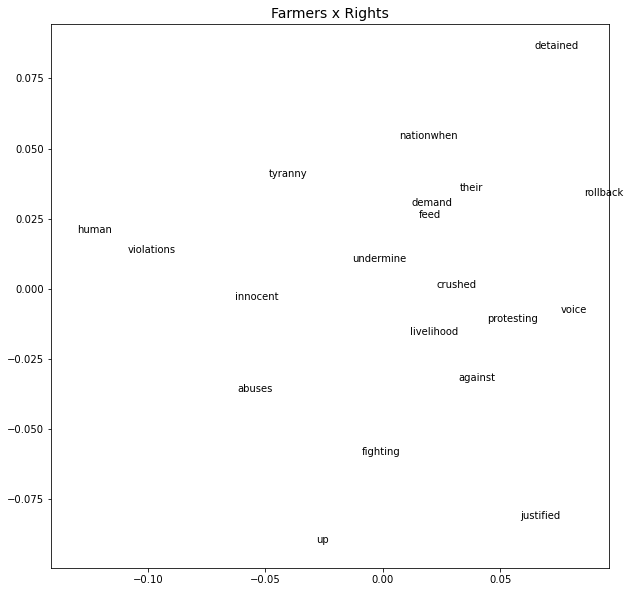

In [295]:
# Matplotlib for farmers x rights based on similarity

import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors)):
    ax.annotate(rights_tokens[i], ((embeddings[i,0], embeddings[i,1])))
    
plt.title("Farmers x Rights", fontsize=14)
plt.show()

In [315]:
# Instantiate a vector

propaganda_vector = model.wv.most_similar(positive=['farmers', 'propaganda'], topn=20)

# Just get words

propaganda_tokens = [token1 for token1, weight1 in propaganda_vector]

In [316]:
# Get the vector for each sampled word

vectors_1 = [model.wv[word1] for word1 in propaganda_tokens] 

In [317]:
# Calculate distances among texts in vector space

from sklearn.metrics import pairwise
dist_matrix1 = pairwise.pairwise_distances(vectors_1, metric='cosine')

In [350]:
#trying to repair error

#dissimilarity = check_symmetric(dissimilarity, raise_exception=True)

import numpy as np
from sklearn.utils.validation import check_symmetric

A_ = np.random.random(size=(1000, 1000))
A = A_.dot(A_.T)
A[2,1] += 1e-2

A_repaired = check_symmetric(A)       # default: raise_warning=True, raise_exception=False)
print('max error: ', np.amax(np.abs(A - A.T)))        
print('max error repaired: ', np.amax(A_repaired - A_repaired.T))

max error:  0.009999999999990905
max error repaired:  0.0


D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  return f(*args, **kwargs)


In [361]:
# Multi-Dimensional Scaling

import numpy as np

from sklearn.manifold import MDS
#mat = dist_matrix1.astype(np.float64)
mds1 = MDS(n_components = 2)
embeddings1 = mds1.fit_transform(dist_matrix1)
#embeddings1

D:\ANACONDA\lib\site-packages\sklearn\manifold\_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


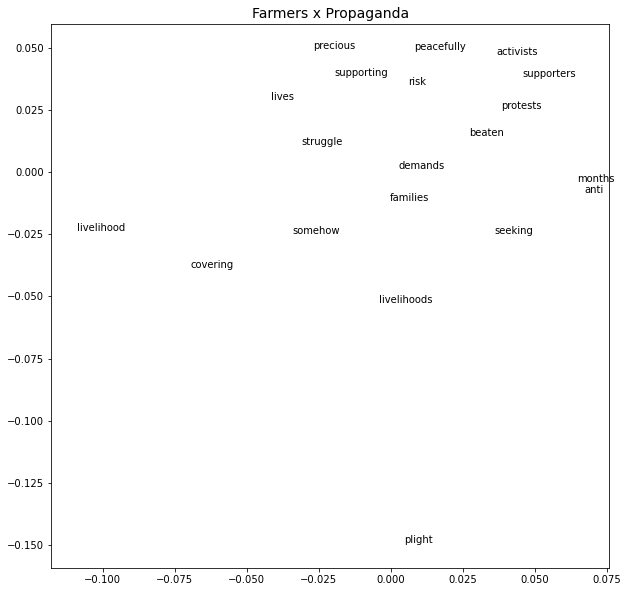

In [363]:
# Matplotlib for farmers x rights based on similarity

import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings1[:,0], embeddings1[:,1], alpha=0)
for i in range(len(vectors_1)):
    ax.annotate(propaganda_tokens[i], ((embeddings1[i,0], embeddings1[i,1])))
    
plt.title("Farmers x Propaganda", fontsize=14)
plt.show()

In [369]:
### Words in relation to vectors

#getting all words closest to god and instantiating the relationship with man and woman.

#first getting top 20 words most associated with god, and finding the distance between every god word to its proximity to man vector and to woman vector
#so every god word has 2 SCORES -- to man vector and to woman vector
antinational_terms = model.wv.most_similar(positive=['antinational'], topn=30)
antinational_terms = [word for word, score in antinational_terms]

# MAN
farmers_scores = []
bjp_scores = []

for word in antinational_terms:
    score = model.wv.similarity(word, 'farmers')
    farmers_scores.append(score)
    
for word in antinational_terms:
    score = model.wv.similarity(word, 'bjp')
    bjp_scores.append(score)
    
len(bjp_scores), len(farmers_scores)

(30, 30)

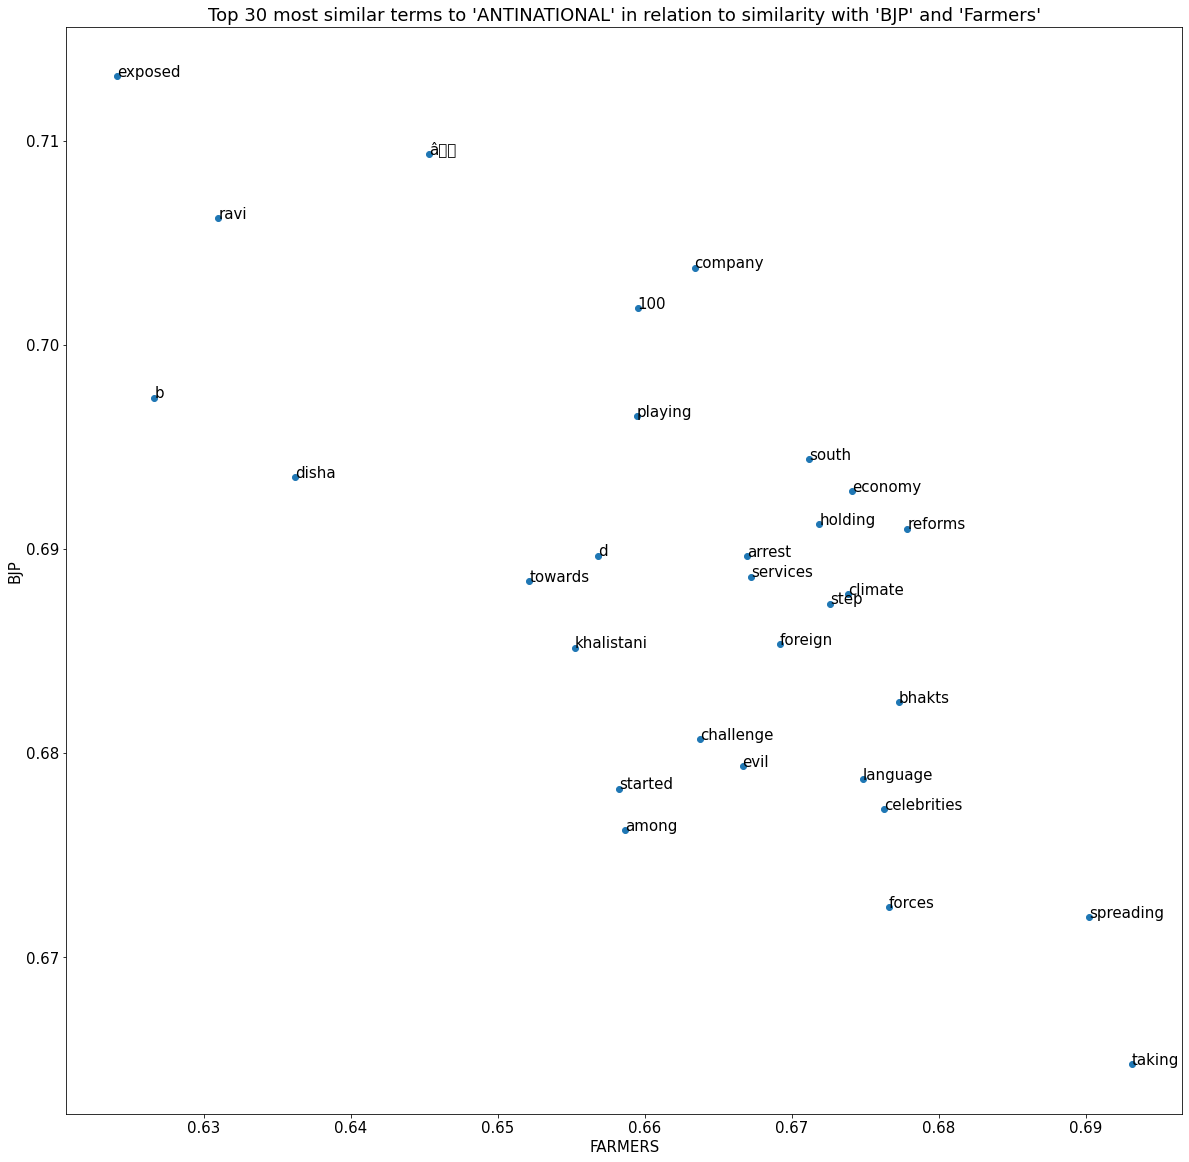

In [372]:
# Simple plot

plt.rcParams.update({'font.size': 15})
_, ax = plt.subplots(figsize=(20, 20))
ax.scatter(farmers_scores, bjp_scores)
plt.xlabel ('FARMERS')
plt.ylabel ('BJP')

for i, txt in enumerate(antinational_terms):
    ax.annotate(txt, (farmers_scores[i], bjp_scores[i]))
    
plt.title("Top 30 most similar terms to 'ANTINATIONAL' in relation to similarity with 'BJP' and 'Farmers'")
plt.show()
#almost equally distant for both man and woman vectors

In [374]:
### Words in relation to vectors

#getting all words closest to god and instantiating the relationship with man and woman.

#first getting top 20 words most associated with god, and finding the distance between every god word to its proximity to man vector and to woman vector
#so every god word has 2 SCORES -- to man vector and to woman vector
democracy_terms = model.wv.most_similar(positive=['democracy'], topn=20)
democracy_terms = [word for word, score in democracy_terms]

# MAN
farmers_scores1 = []
bjp_scores1 = []

for word in democracy_terms:
    score = model.wv.similarity(word, 'farmers')
    farmers_scores1.append(score)
    
for word in democracy_terms:
    score = model.wv.similarity(word, 'bjp')
    bjp_scores1.append(score)
    
len(bjp_scores1), len(farmers_scores1)

(20, 20)

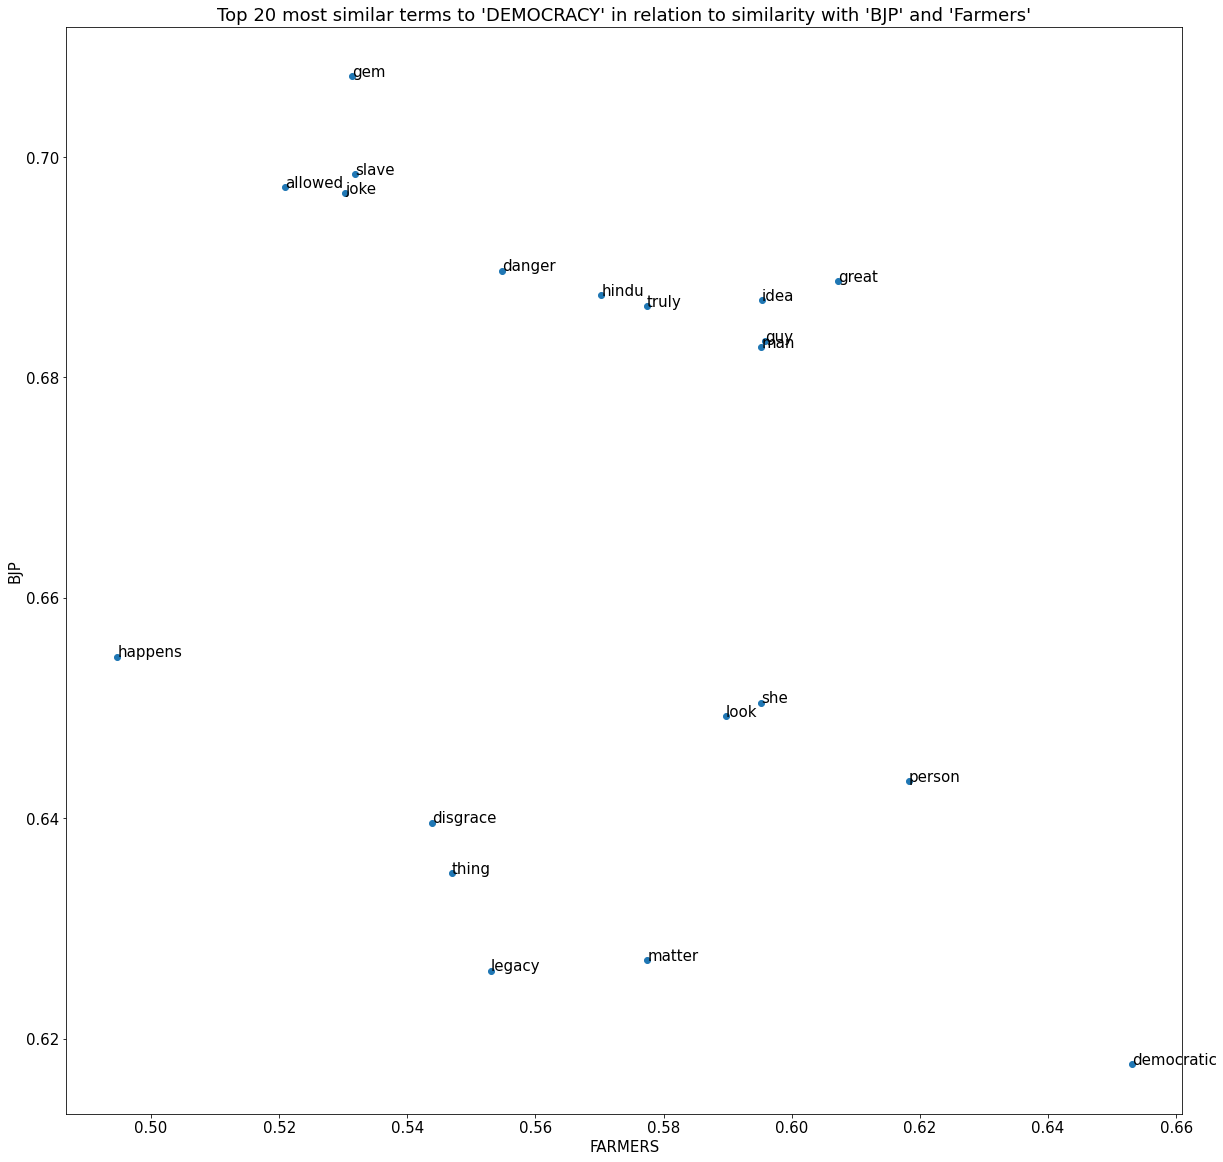

In [376]:
# Simple plot

plt.rcParams.update({'font.size': 15})
_, ax = plt.subplots(figsize=(20, 20))
ax.scatter(farmers_scores1, bjp_scores1)
plt.xlabel ('FARMERS')
plt.ylabel ('BJP')

for i, txt in enumerate(democracy_terms):
    ax.annotate(txt, (farmers_scores1[i], bjp_scores1[i]))
    
plt.title("Top 20 most similar terms to 'DEMOCRACY' in relation to similarity with 'BJP' and 'Farmers'")
plt.show()
#almost equally distant for both man and woman vectors

#VERY INTERESTING -- "Democratic" as a term has most similarity with FARMERS, almost none with BJP

#A picture is emerging -- compare the close read versions of celebrity tweets and then use this data
#to talk about the THINGS farmers have been associated with in the digital culture realm
#Hashtags cannot be proxies for activism but if we see them as CHOREOGRAPHY of ASSEMBLY, then these results
#Show that the assembly was perceived as DEMOCRATIC, POSITIVE